In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### equal weighted holdings vs all in one stock

Explore equal weighted holdings and all in one using Retail companies.


In [2]:
Cost = pd.read_csv('DATA/Cost.csv', index_col ='Date', parse_dates=True)['Adj Close']

In [3]:
Wmt = pd.read_csv('DATA/WMT.csv', index_col ='Date', parse_dates=True)['Adj Close']

In [4]:
Tgt = pd.read_csv('DATA/Tgt.csv', index_col ='Date', parse_dates=True)['Adj Close']

In [5]:
Dg = pd.read_csv('DATA/DG.csv', index_col ='Date', parse_dates=True)['Adj Close']

In [6]:
# PUT STOCK DATA TOGETHER TO ANALYZE THE HOLDINGS HISTORICALLY.
retail = pd.concat([Cost,Wmt,Tgt,Dg], axis=1)

In [7]:
retail.columns=['COST','WMT','TGT','DG']

In [8]:
retail

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478
...,...,...,...,...
2021-08-27,450.339996,146.520004,249.179993,225.250000
2021-08-30,455.929993,147.699997,249.360001,225.360001
2021-08-31,455.489990,148.100006,246.979996,222.910004


In [9]:
retail_returns = retail.pct_change(1).dropna()

##### High spikes indicate a significant level of volatility in the specific stock.

<AxesSubplot:xlabel='Date'>

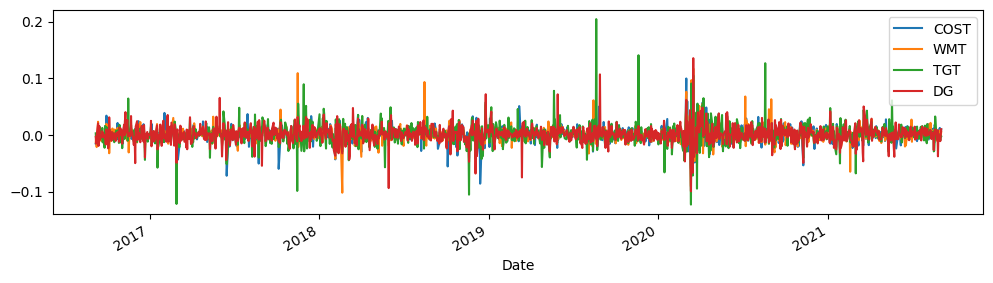

In [10]:
retail_returns.plot(figsize=(12,3))


#### The cumulative percent return at any point in time provides a simple and effective way to compare the performance of individual stocks. 


In [11]:
cumul_return = (1 + retail_returns['COST']).cumprod() - 1

In [12]:
cumul_perc_return = 100 * cumul_return

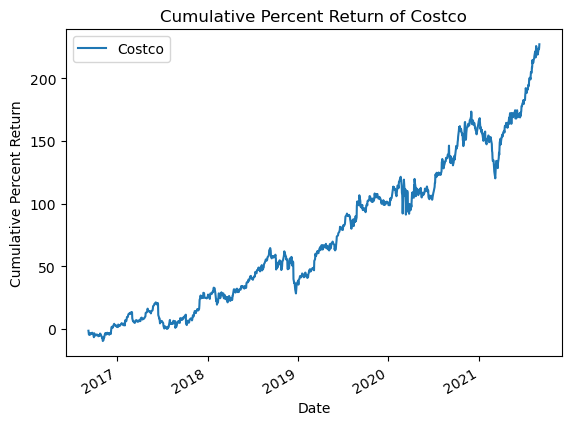

In [13]:
cumul_perc_return.plot(label ='Costco')
plt.title('Cumulative Percent Return of Costco')
plt.ylabel('Cumulative Percent Return')
plt.legend()

In [14]:
# daily return for the Portfolio through out time

N = len(retail_returns.columns)
equal_weights = N * [1/N]


equal_returns = np.dot(equal_weights, retail_returns.transpose())

In [15]:
equal_returns

array([-0.00720156, -0.01103371, -0.01181137, ..., -0.00466819,
       -0.00083906,  0.00573659])

In [16]:
cum_equal_weighted_returns = (1 + equal_returns).cumprod() - 1

In [17]:
cum_equal_weighted_returns

array([-0.00720156, -0.01815581, -0.02975273, ...,  2.32411376,
        2.32132463,  2.34037771])

In [18]:
cum_equal_weighted_returns_perc = cum_equal_weighted_returns * 100

In [19]:
cewrp = pd.Series(cum_equal_weighted_returns_perc, index = retail_returns.index)

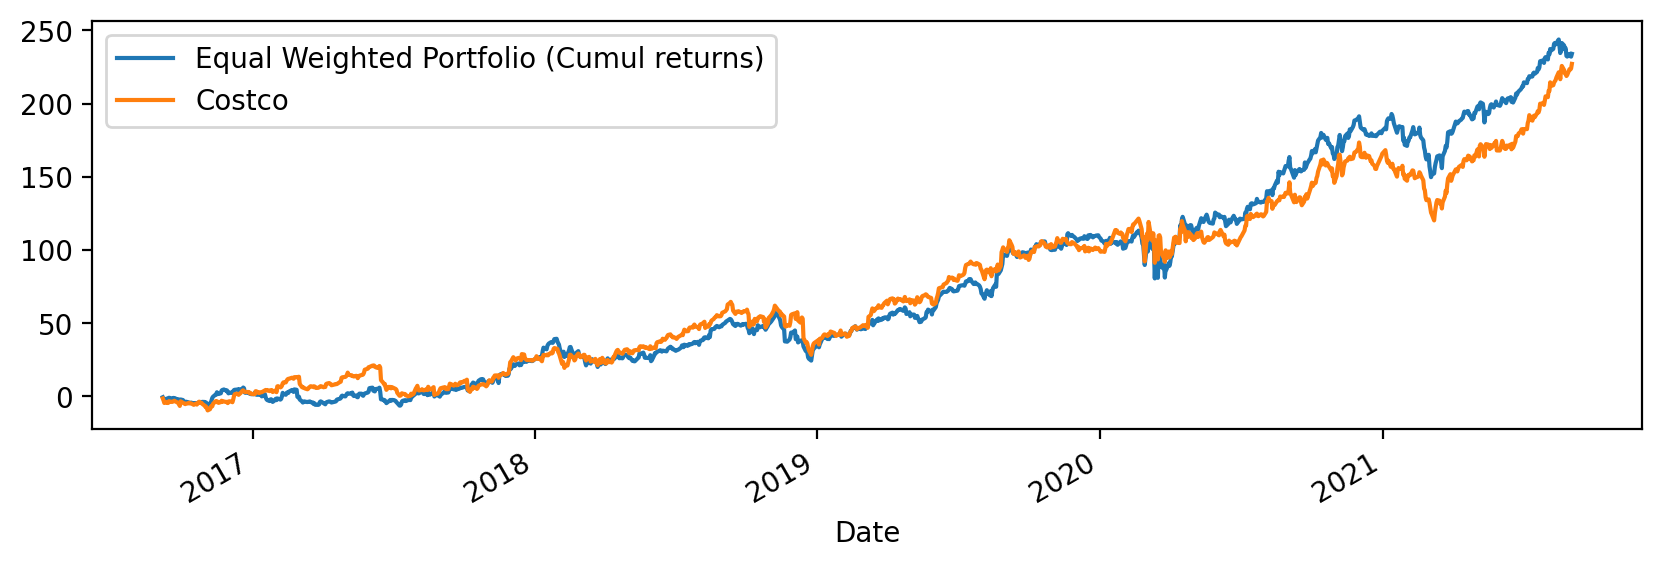

In [20]:
plt.figure(figsize=(10,3), dpi= 200)
cewrp.plot(label = 'Equal Weighted Portfolio (Cumul returns)')
cumul_perc_return.plot(label ='Costco')

plt.legend()

**According to historical stock data analysis, an equally weighted portfolio outperforms the strategy of investing all funds into a single stock like Costco.**

**Diversifying investments across multiple assets with equal weightings has been shown to yield better performance compared to concentrating all resources in a single stock.**


**Monte Carlo Simulation for Optimization Search

**To optimize a portfolio, I will employ a Monte Carlo simulation to randomly sample different weightings of assets. By plotting the returns, risk, and Sharpe Ratios of these simulated portfolios, I can visually identify the desired allocation that balances risk and reward.

In [21]:
# Log Returns as Percent of next day
log_rets = np.log(1 + retail.pct_change(1)).dropna()

In [22]:
log_rets

,COST,WMT,TGT,DG
Date,,,,
2016-09-07,-0.015429,-0.012960,0.002849,-0.003478
2016-09-08,-0.014040,-0.003197,-0.012021,-0.015166
2016-09-09,-0.018214,-0.021530,-0.006644,-0.001275
2016-09-12,0.006548,0.023060,0.004338,0.020268
2016-09-13,-0.006283,-0.006695,-0.005208,-0.019558
...,...,...,...,...
2021-08-27,0.002290,-0.005649,0.000883,-0.002882
2021-08-30,0.012336,0.008021,0.000722,0.000488
2021-08-31,-0.000966,0.002705,-0.009590,-0.010931


#### Generating Random Weights

In [23]:
N = len(retail.columns)

weights = np.random.random(N)

weights = weights/ np.sum(weights)

In [24]:
weights

array([0.31453818, 0.17525819, 0.03251215, 0.47769149])

In [25]:
np.sum(weights)

0.9999999999999999

In [26]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

**Need two functions, one that gives the returns for a specific weighting and another that reports back the volatility for a specific weighting.

#### Portfolio Returns Function

In [27]:
def calculate_returns(weights, log_rets):
    return np.sum(log_rets.mean()*weights) * 252

#### Portfolio Volatility (Variance) Function

In [28]:
log_rets.cov()

,COST,WMT,TGT,DG
COST,0.000176,0.000107,0.000120,0.000104
WMT,0.000107,0.000187,0.000121,0.000108
TGT,0.000120,0.000121,0.000370,0.000170
DG,0.000104,0.000108,0.000170,0.000248


In [29]:
log_rets_cov = log_rets.cov()

In [30]:
def calculate_volatility(weights, log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252, weights)
    vol = np.dot(weights.transpose(), annualized_cov)
    return np.sqrt(vol)

In [31]:
calculate_volatility(weights, log_rets_cov)

0.19473207537868195

**Create many, many random weightings, and we can then plot them on expected return vs. expected volatility (coloring them by Sharpe Ratio):

In [32]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []

for sim in range(6000):
    
    weights = gen_weights(N=4)
    mc_weights.append(weights)
    
    sim_returns = calculate_returns(weights,log_rets)
    mc_portfolio_returns.append(sim_returns)

    sim_vol = calculate_volatility(weights,log_rets_cov)
    mc_portfolio_vol.append(sim_vol)



In [33]:
len(mc_portfolio_returns)

6000

In [34]:
mc_sharpe_ratios = np.array(mc_portfolio_returns) / np.array(mc_portfolio_vol)

Text(0, 0.5, 'RETURN')

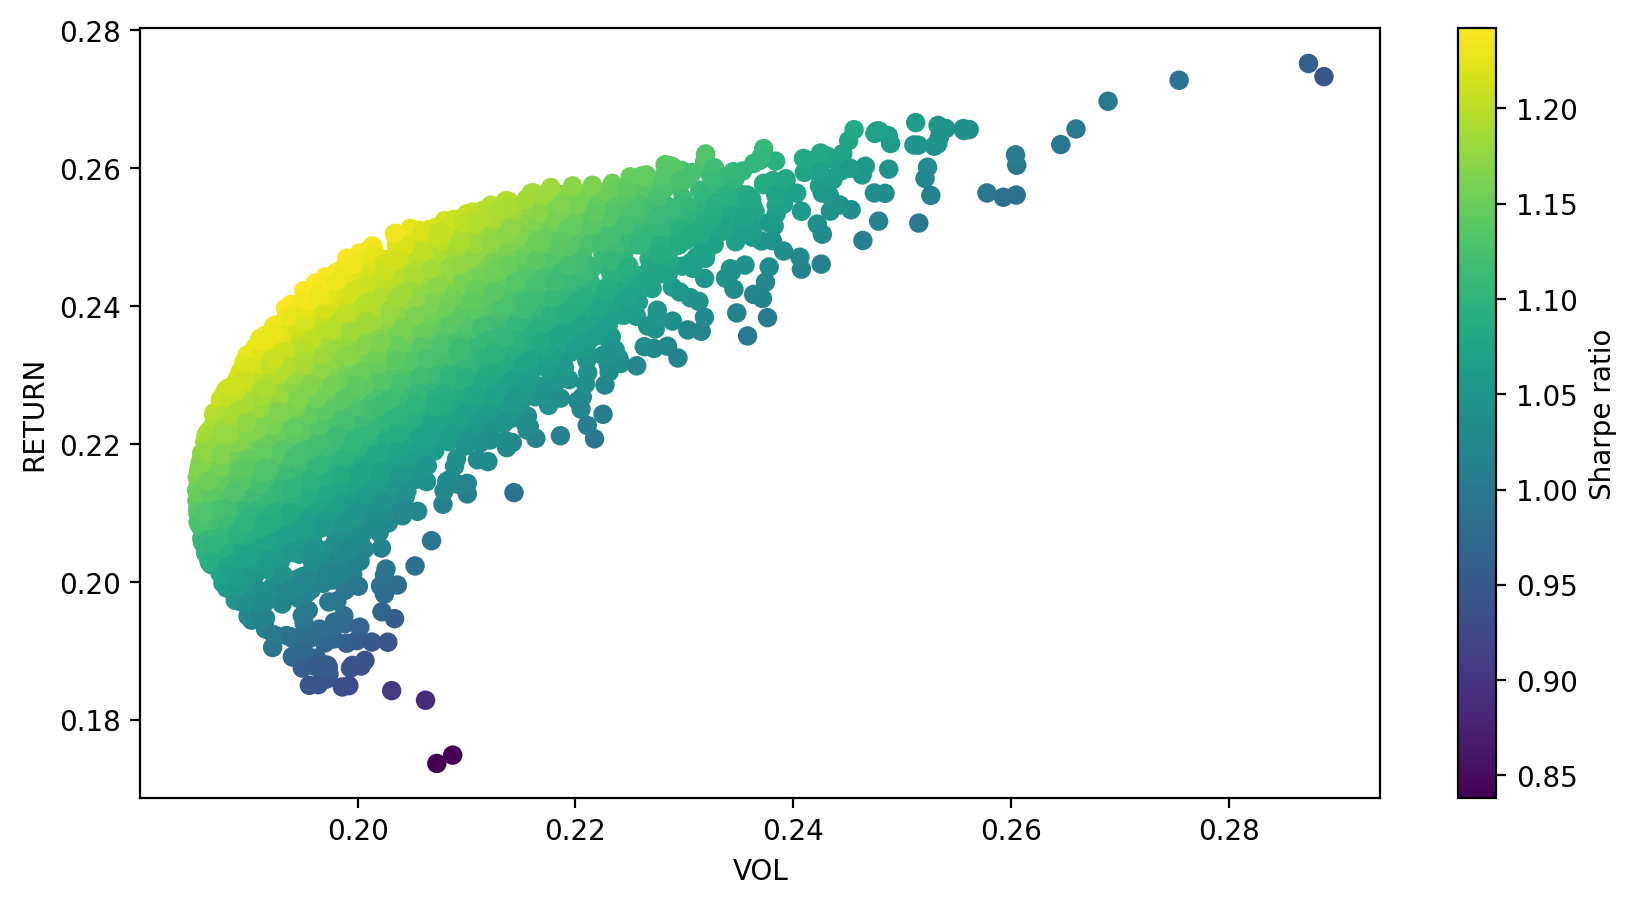

In [35]:
plt.figure(dpi = 200, figsize=(10,5))
plt.scatter(mc_portfolio_vol, mc_portfolio_returns, c=mc_sharpe_ratios)
plt.colorbar(label= 'Sharpe ratio')
plt.xlabel('VOL')
plt.ylabel('RETURN')

In [36]:
np.argmax(mc_sharpe_ratios)

4979

In [47]:
mc_weights[4642]

array([0.23697104, 0.3691392 , 0.14651253, 0.24737723])

**To maximize profit over time, the allocation should be adjusted based on the percentages given:

**Allocate 23% of resources to Costco.
**Allocate 36% of resources to Walmart.
**Allocate 14% of resources to Target.
**Allocate 24% of resources to Dollar General.

**this is based on the Optimal Weighting through Minimization Search

## Optimal Weighting through Minimization Search

In [38]:
from scipy.optimize import minimize

In [39]:
def function_to_minimize(weights):
    # minimize a -1 * sharpe ratio
    
    return -1 * (calculate_returns(weights,log_rets) / calculate_volatility(weights,log_rets_cov))

In [40]:
bounds = tuple((0,1) for n in range(N))

In [41]:
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [42]:
sum_constraint = ({'type':'eq','fun':lambda weights: np.sum(weights)-1})

In [43]:
minimize(fun=function_to_minimize, x0=equal_weights, bounds= bounds, constraints = sum_constraint)

     fun: -1.2451267776087591
     jac: array([-3.51712108e-04,  5.83363324e-02,  1.11971796e-03,  3.20225954e-05])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.58456807, 0.        , 0.17679024, 0.2386417 ])

In [44]:
retail.columns

Index(['COST', 'WMT', 'TGT', 'DG'], dtype='object')

<AxesSubplot:xlabel='Date'>

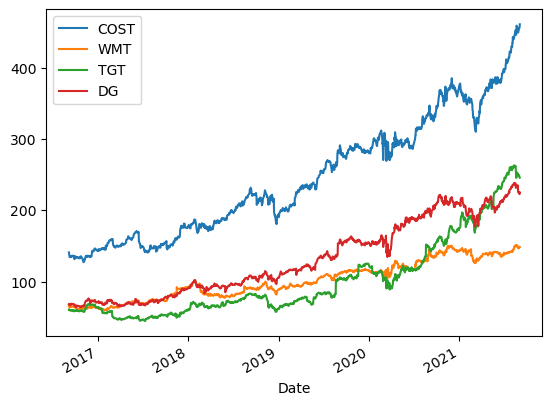

In [45]:
retail.plot()

To maximize profit over time, the allocation should be adjusted based on the percentages given:

Allocate 58% of resources to Costco.
Allocate 0% of resources to Walmart.
Allocate 17% of resources to Target.
Allocate 23% of resources to Dollar General.

this is based on the Optimal Weighting through Minimization Search

In [48]:
expected_returns_range = np.linspace(0.18,0.28,100)

In [49]:
#expected_returns_range

array([0.18      , 0.1810101 , 0.1820202 , 0.1830303 , 0.1840404 ,
       0.18505051, 0.18606061, 0.18707071, 0.18808081, 0.18909091,
       0.19010101, 0.19111111, 0.19212121, 0.19313131, 0.19414141,
       0.19515152, 0.19616162, 0.19717172, 0.19818182, 0.19919192,
       0.20020202, 0.20121212, 0.20222222, 0.20323232, 0.20424242,
       0.20525253, 0.20626263, 0.20727273, 0.20828283, 0.20929293,
       0.21030303, 0.21131313, 0.21232323, 0.21333333, 0.21434343,
       0.21535354, 0.21636364, 0.21737374, 0.21838384, 0.21939394,
       0.22040404, 0.22141414, 0.22242424, 0.22343434, 0.22444444,
       0.22545455, 0.22646465, 0.22747475, 0.22848485, 0.22949495,
       0.23050505, 0.23151515, 0.23252525, 0.23353535, 0.23454545,
       0.23555556, 0.23656566, 0.23757576, 0.23858586, 0.23959596,
       0.24060606, 0.24161616, 0.24262626, 0.24363636, 0.24464646,
       0.24565657, 0.24666667, 0.24767677, 0.24868687, 0.24969697,
       0.25070707, 0.25171717, 0.25272727, 0.25373737, 0.25474

In [52]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
              {'type':'eq','fun': lambda weights:calculate_returns(weights,log_rets)- possible_return})

In [53]:
def calculate_vol(weights):
    annulized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(), annulized_cov)
    return np.sqrt(vol)

In [54]:
frontier_vol = []
portfolio_holdings = []

for possible_return in expected_returns_range:
    
    result = minimize(calculate_vol,equal_weights,bounds=bounds,
                     constraints= constraints)
    # volatility for the return
    frontier_vol.append(result['fun'])
    portfolio_holdings.append(result['x'])

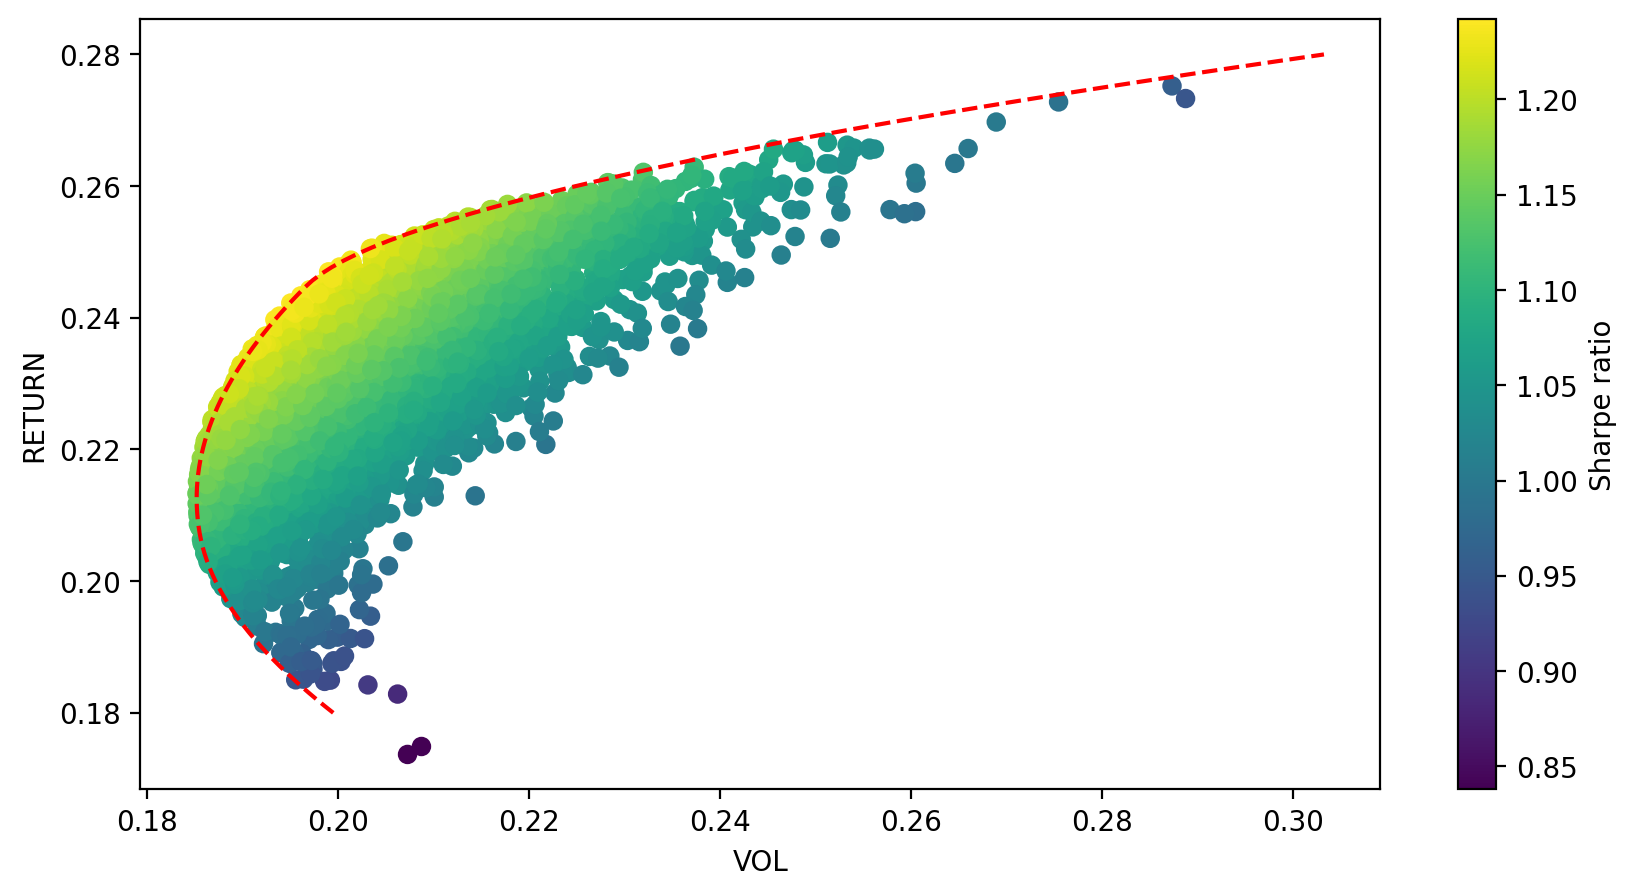

In [55]:
plt.figure(dpi = 200, figsize=(10,5))
plt.scatter(mc_portfolio_vol, mc_portfolio_returns, c=mc_sharpe_ratios)
plt.colorbar(label= 'Sharpe ratio')
plt.xlabel('VOL')
plt.ylabel('RETURN')

plt.plot(frontier_vol, expected_returns_range, color='red', ls='--')

In [56]:
portfolio_holdings[0]

array([0.15355315, 0.7773947 , 0.        , 0.06905215])

In [58]:
frontier_vol = np.array(frontier_vol)

In [59]:
np.where(frontier_vol > 0.24)

(array([84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

In [60]:
portfolio_holdings[84]

array([0.36471676, 0.        , 0.63528324, 0.        ])

In [61]:
frontier_vol[84]

0.24006958240931453